# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [23]:
def apply_svd_custom(X_train, X_test, n_components):
    mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - mean
    X_test_centered = X_test - mean

    A = X_train_centered
    m, n = A.shape

    if m >= n:
        ATA = np.dot(A.T, A)  # Covariance matrix
        eigvals, eigvecs = np.linalg.eigh(ATA)
    else:
        AAT = np.dot(A, A.T)
        eigvals, eigvecs = np.linalg.eigh(AAT)

    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    singular_values = np.sqrt(np.maximum(eigvals[:n_components], 0))

    singular_values[singular_values == 0] = 1e-10

    if m >= n:
        V = eigvecs[:, :n_components]
        U = np.dot(A, V) / singular_values
    else:
        U = eigvecs[:, :n_components]
        V = np.dot(A.T, U) / singular_values

    X_train_svd = np.dot(U, np.diag(singular_values))
    X_test_svd = np.dot(X_test_centered, V)

    return X_train_svd, X_test_svd, V


## Part 3: Train Logistic Regression and Measure Performance

In [24]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [25]:
svd_components = [1, 5, 15, 35, 80, 120, 185, 290, 450, 620, 784]

final_results = []

print("Training models with different levels of SVD preprocessing...")

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    X_train_svd, X_test_svd, right_singular_vectors = apply_svd_custom(X_train, X_test, n_components)

    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    final_results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time,
        'right_singular_vectors': right_singular_vectors
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

print("SVD Components | Accuracy | Training Time (seconds)")
for result in final_results:
    print(f"{result['n_components']} | {result['accuracy']:.4f} | {result['training_time']:.4f}")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 1 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 1, Accuracy: 0.3069, Training time: 0.6051 seconds
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6796, Training time: 1.0362 seconds
Applying custom SVD with 15 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 15, Accuracy: 0.8424, Training time: 2.7387 seconds
Applying custom SVD with 35 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 35, Accuracy: 0.8999, Training time: 7.9943 seconds
Applying custom SVD with 80 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 80, Accuracy: 0.9164, Training time: 29.9188 seconds
Applying custom SVD with 120 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 120, Accuracy: 0.9186, Training time: 62.2187 seconds
Applying custom SVD with 185 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 185, Accuracy: 0.9206, Training time: 93.4752 seconds
Applying custom SVD with 290 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 290, Accuracy: 0.9208, Training time: 160.5712 seconds
Applying custom SVD with 450 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 450, Accuracy: 0.9200, Training time: 317.2140 seconds
Applying custom SVD with 620 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 620, Accuracy: 0.9208, Training time: 465.5326 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 579.1400 seconds
SVD Components | Accuracy | Training Time (seconds)
1 | 0.3069 | 0.6051
5 | 0.6796 | 1.0362
15 | 0.8424 | 2.7387
35 | 0.8999 | 7.9943
80 | 0.9164 | 29.9188
120 | 0.9186 | 62.2187
185 | 0.9206 | 93.4752
290 | 0.9208 | 160.5712
450 | 0.9200 | 317.2140
620 | 0.9208 | 465.5326
784 | 0.9207 | 579.1400


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


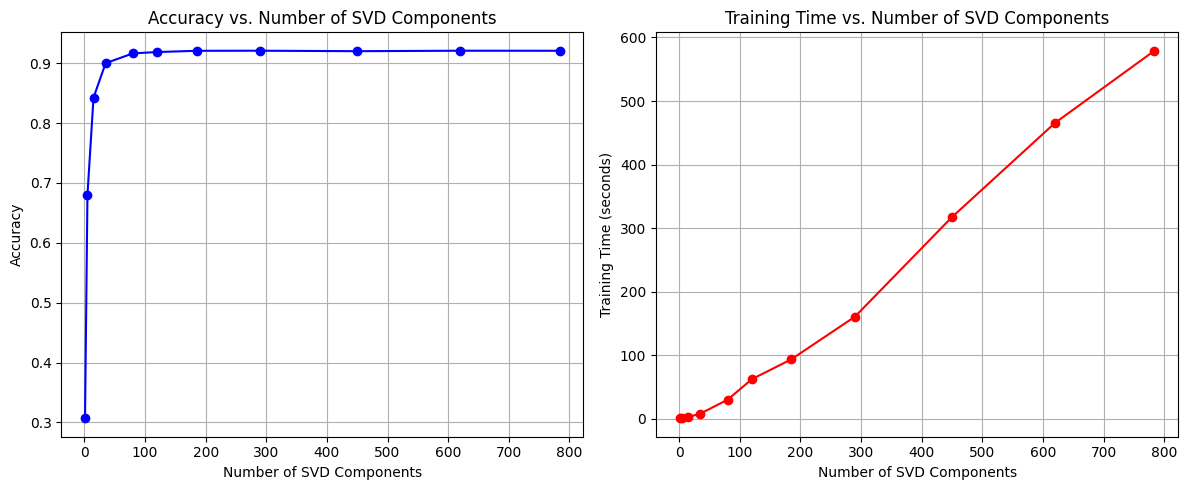

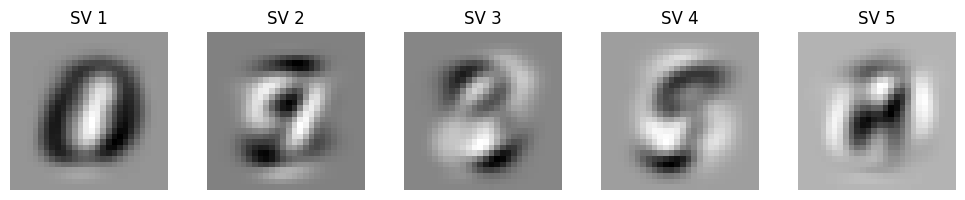

In [26]:
import numpy as np
import matplotlib.pyplot as plt

components = [result['n_components'] for result in final_results]
accuracy = [result['accuracy'] for result in final_results]
training_time = [result['training_time'] for result in final_results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracy, marker='o', color='b', label='Accuracy')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of SVD Components')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(components, training_time, marker='o', color='r', label='Training Time (seconds)')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of SVD Components')
plt.grid(True)

plt.tight_layout()
plt.show()

top_result = final_results[-1]
top_singular_vectors = top_result['right_singular_vectors'].T[:5]

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_singular_vectors[i].reshape(28, 28), cmap='gray')
    plt.title(f'SV {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [31]:
# As the number of SVD components increases, accuracy improves rapidly up to around 80 components:
# With 1 component, accuracy is just 30.69%.
# By 80 components, accuracy rises to 91.64%.
# After 80 components, accuracy only shows small improvements:
# At 185 components, accuracy is 92.06%.
# At 784 components, accuracy is 92.07%.
# Training time increases dramatically as more components are used:
# 1 component took only 0.6 seconds.
# 80 components took 30 seconds.
# 784 components required a substantial 579 seconds (over 9 minutes).
# The best range seems to be around that 35-80 components rnage:
# 35 components yield 89.99% accuracy in 8 seconds.
# 80 components give the highest accuracy of 91.64% in about 30 seconds.

# Most of the useful information is captured within the first 80 components. Beyond this point, adding more components doesn’t significantly improve accuracy.
# There is a very big trade-off between accuracy and training time. While accuracy slightly increases with more components, the training time rises significantly, making the use of too many components inefficient.
# Using between 80 and 185 components balances accuracy and training time effectively. Beyond this range, accuracy gains are negligible, but training time becomes way too long.
